# Ankur shukla

# House Price Perdiction 🏡 = ❓ 💰

\
###Import basic library





In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


### Read and VISUALISE  data

In [15]:
dataset = pd.read_csv("data.csv")
dataset.head()





,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


In [16]:
!pip install sweetviz

You should consider upgrading via the 'C:\Users\Ankur Shukla\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


###this is third party module to visualise large data

In [17]:
import sweetviz as sv

report= sv.analyze(dataset)
report.show_html("report.html")



Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


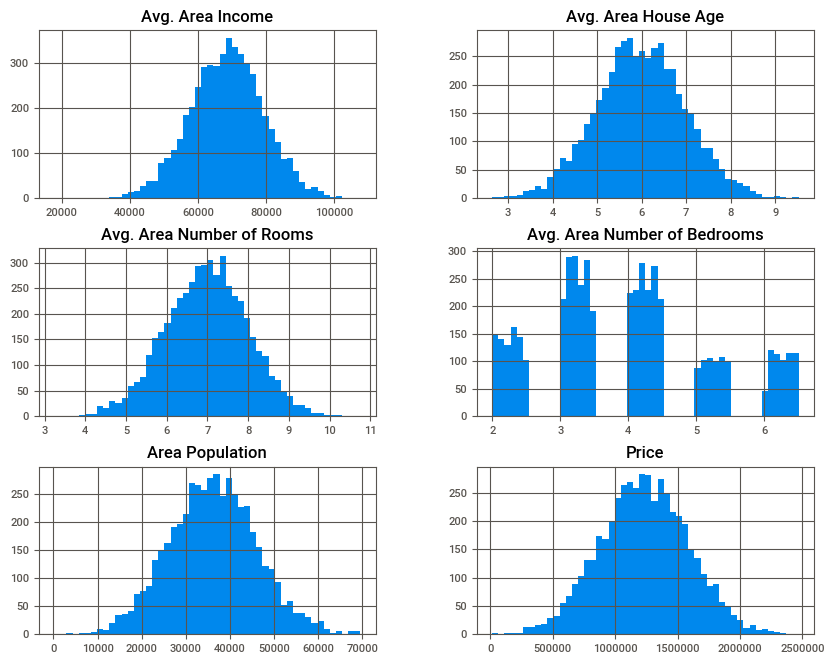

In [18]:
# other ways to visualize 
dataset.hist(bins=50, figsize=(10, 8))
plt.show()

###now we know address data do not affect target

In [19]:
# removing address column
x = dataset.iloc[:,:-2].values
y = dataset.iloc[:,-2].values

### Split data to train and test data ( to find accuracy ) 

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)


In [21]:
# testdata=pd.read_csv("test.csv")
# xtest= testdata.iloc[:,:-1].values
# ytest= testdata.iloc[:,-1].vaues

### Model selection 
###### Here i selected all as it is good practice to see all model  

#####multiple linear regression

In [22]:
from sklearn.linear_model import LinearRegression
multi = LinearRegression()
multi.fit(xtrain,ytrain)

LinearRegression()

#####decission tree regression

In [23]:
from sklearn.tree import DecisionTreeRegressor
decisn= DecisionTreeRegressor(random_state=0)
decisn.fit(xtrain,ytrain)

DecisionTreeRegressor(random_state=0)

#####polynomial regression tree

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
pol_degree = PolynomialFeatures(degree= 3)
xpoly= pol_degree.fit_transform(xtrain)
poly= LinearRegression()
poly.fit(xpoly,ytrain)

LinearRegression()

#####support vector regression (SVR)
#####{***here we need to do feature scaling*** }


In [25]:
# Feature scaling 
from sklearn.preprocessing import StandardScaler
scx= StandardScaler()
scy= StandardScaler()

xtrain_svr = scx.fit_transform(xtrain)
ytrain_svr = scy.fit_transform(ytrain.reshape(len(ytrain),1))


# training the model
from sklearn.svm import SVR
svr_mod= SVR(kernel = 'rbf')
svr_mod.fit(xtrain_svr,ytrain_svr) 

C:\Users\Ankur Shukla\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

##### random forest regression

In [26]:
from sklearn.ensemble import RandomForestRegressor
rand_forest= RandomForestRegressor(n_estimators = 10,random_state=0)
rand_forest.fit(xtrain,ytrain)


RandomForestRegressor(n_estimators=10, random_state=0)

### Predicting with accuracy

###### multiple regression

[[ 969608.35  894251.07]
 [ 953868.16  932979.36]
 [ 907506.33  920747.91]
 ...
 [1423701.02 1372994.29]
 [ 744400.93  770770.58]
 [ 488525.83  529282.08]]


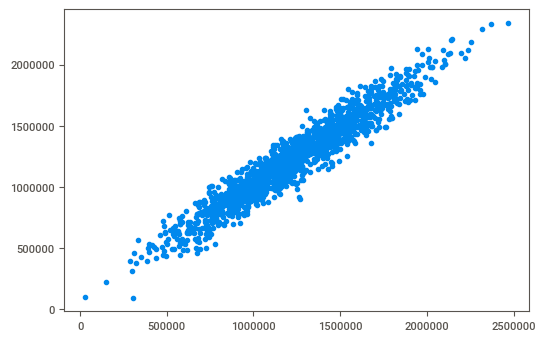

In [28]:
ypred_mul = multi.predict(xtest)
np.set_printoptions(precision=2)
print(np.concatenate((ypred_mul.reshape(len(ypred_mul),1), ytest.reshape(len(ytest),1)),1))
plt.scatter(ytest,ypred_mul)
plt.show()
# accuracy
from sklearn.metrics import r2_score
multi_accu=r2_score(ytest,ypred_mul)


# this is first prediction
m=multi.predict([[79545.458574,	5.682861	,7.009188	,4.09	,23086.800503]])

##### decission tree 

[[ 990004.73  894251.07]
 [1019880.65  932979.36]
 [ 879511.2   920747.91]
 ...
 [1717570.53 1372994.29]
 [ 734562.1   770770.58]
 [ 469262.82  529282.08]]


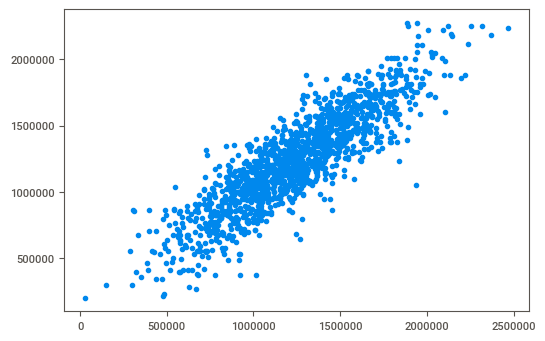

In [31]:
ypred_dis= decisn.predict(xtest)
np.set_printoptions(precision=2)
print(np.concatenate((ypred_dis.reshape(len(ypred_dis),1), ytest.reshape(len(ytest),1)),1))
plt.scatter(ytest,ypred_dis)
plt.show()
#  accuracy
from sklearn.metrics import r2_score
dec_accu=r2_score(ytest,ypred_dis)

d=decisn.predict([[79545.458574,	5.682861,	7.009188	,4.09	,23086.800503]])

#####polynomial decission tree

[[ 962312.13  894251.07]
 [ 943283.02  932979.36]
 [ 912765.58  920747.91]
 ...
 [1430128.95 1372994.29]
 [ 754639.21  770770.58]
 [ 513444.57  529282.08]]


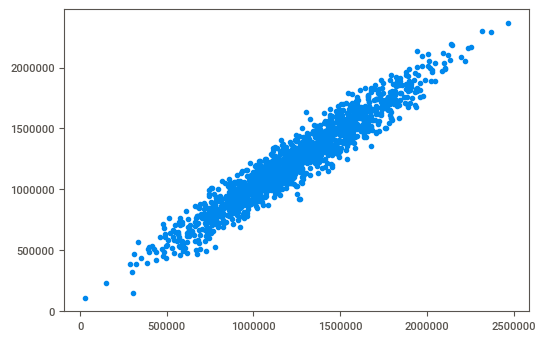

In [32]:
ypred = poly.predict(pol_degree.transform(xtest))
np.set_printoptions(precision=2)
print(np.concatenate((ypred.reshape(len(ypred),1), ytest.reshape(len(ytest),1)),1))
plt.scatter(ytest,ypred)
plt.show()
# accuracy 
from sklearn.metrics import r2_score
pol_accu=r2_score(ytest,ypred)

p=poly.predict(pol_degree.transform([[79545.458574	,5.682861,	7.009188,	4.09	,23086.800503]]))

#####SVR

In [33]:
ypred = scy.inverse_transform(svr_mod.predict(scx.transform(xtest)).reshape(len(ytest),1))
np.set_printoptions(precision=2)
print(np.concatenate((ypred.reshape(len(ypred),1), ytest.reshape(len(ytest),1)),1))

# Accuracy
from sklearn.metrics import r2_score
svr_accu=r2_score(ytest, ypred)


s = scy.inverse_transform(svr_mod.predict(scx.transform([[79545.458574	,5.682861,	7.009188,	4.09	,23086.800503]])).reshape(1,1))

[[ 969821.18  894251.07]
 [ 928071.97  932979.36]
 [ 895873.89  920747.91]
 ...
 [1421330.15 1372994.29]
 [ 757720.39  770770.58]
 [ 550435.06  529282.08]]


#####Random Forest regression

[[ 952941.6   894251.07]
 [1002746.88  932979.36]
 [ 883687.97  920747.91]
 ...
 [1364213.09 1372994.29]
 [ 732782.72  770770.58]
 [ 486092.22  529282.08]]


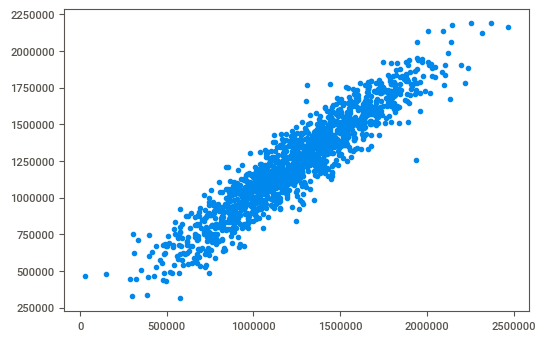

In [34]:
ypred= rand_forest.predict(xtest)
np.set_printoptions(precision=2)
print(np.concatenate((ypred.reshape(len(ypred),1), ytest.reshape(len(ytest),1)),1))
plt.scatter(ytest,ypred)
plt.show()
# accuracy
from sklearn.metrics import r2_score
ran_accu=r2_score(ytest, ypred)


r=rand_forest.predict([[79545.458574	,5.682861,	7.009188,	4.09	,23086.800503]])

In [36]:

print("Random forest regression predicts with accuracy of :" )
print(ran_accu)
print("SVR  regression predicts with accuracy of :" )
print(svr_accu)

print("polynomial regression predicts with accuracy of :" )
print(pol_accu)
print("Decision tree regression predicts with accuracy of :" )
print(dec_accu)
print("multiple  regression predicts with accuracy of :" )
print(multi_accu)


Random forest regression predicts with accuracy of :
0.8721924157731928
SVR  regression predicts with accuracy of :
0.9055706446955619
polynomial regression predicts with accuracy of :
0.9179219495537823
Decision tree regression predicts with accuracy of :
0.7557387829668193
multiple  regression predicts with accuracy of :
0.920075764941204


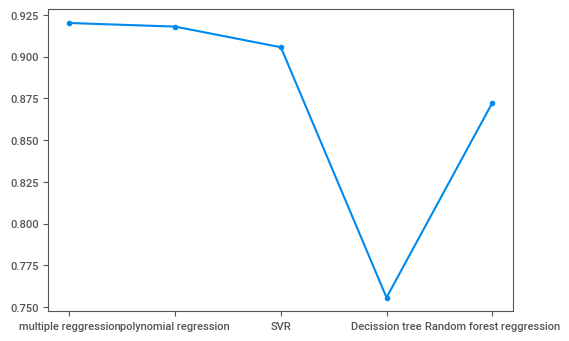

In [37]:
act=[multi_accu,pol_accu,svr_accu,dec_accu,ran_accu]
yaxixp=["multiple reggression","polynomial regression","SVR","Decission tree","Random forest reggression"]
plt.plot(yaxixp,act)
plt.scatter(yaxixp,act)
plt.show()


#Sample prediction   79545.458574	5.682861	7.009188	4.09	23086.800503	    price = 1.059034e+06

[1224554.45] [1225528.21] [[1219282.88]] [1059033.56] [1135582.21]


C:\Users\Ankur Shukla\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\Ankur Shukla\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\ma\core.py:2831: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  _data = np.array(data, dtype=dtype, copy=copy,


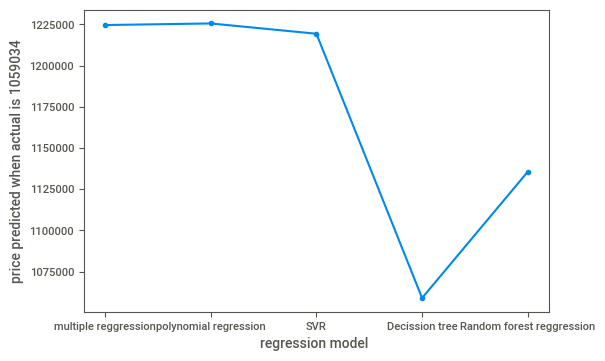

In [47]:
plt.plot(yaxixp,[m,p,s,d,r],)
print(m,p,s,d,r)
plt.xlabel('regression model ')
plt.ylabel('price predicted when actual is 1059034')
plt.scatter(yaxixp,[m,p,s,d,r])
plt.show()